In [1]:
from explainability.structured.core.structured_manipulator import StructuredManipulator
from explainability.structured.core.structured_challenger import SKChallenger
from explainability.structured.samples.explainers.interpretml.morris_explainer import MorrisExplainer
from explainability.structured.samples.explainers.interpretml.pdp_explainer import PDPExplainer
from explainability.structured.samples.explainers.interpretml.ebm_explainer import EBMExplainer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from interpret.glassbox import ExplainableBoostingClassifier

In [2]:
# Load adult income dataset, 100 rows
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, nrows=1000)
df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry",
    "Income"
]
df.drop([
    "fnlwgt", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race",
    "NativeCountry"
], axis=1, inplace=True)
label_column = "Income"

In [3]:
# Define our base scikit-learn model
model = DecisionTreeClassifier(max_depth=3)

# Sample Explainers

In [4]:
class CustomChallenger(SKChallenger):

    def generate_challenges(self) -> None:
        for i in range(2, 5):
            name = f"challenge_{1/i}"
            sm = StructuredManipulator(self.df, self.label_column, self.random_state)
            # replace a different proportion of the values in Age with its mean
            sm.replace_random_values(column="Age", proportion=1/i)
            self.challenges[name] = sm

In [5]:
cc = CustomChallenger(model, df, label_column)
cc.generate_challenges()
cc.train_models()

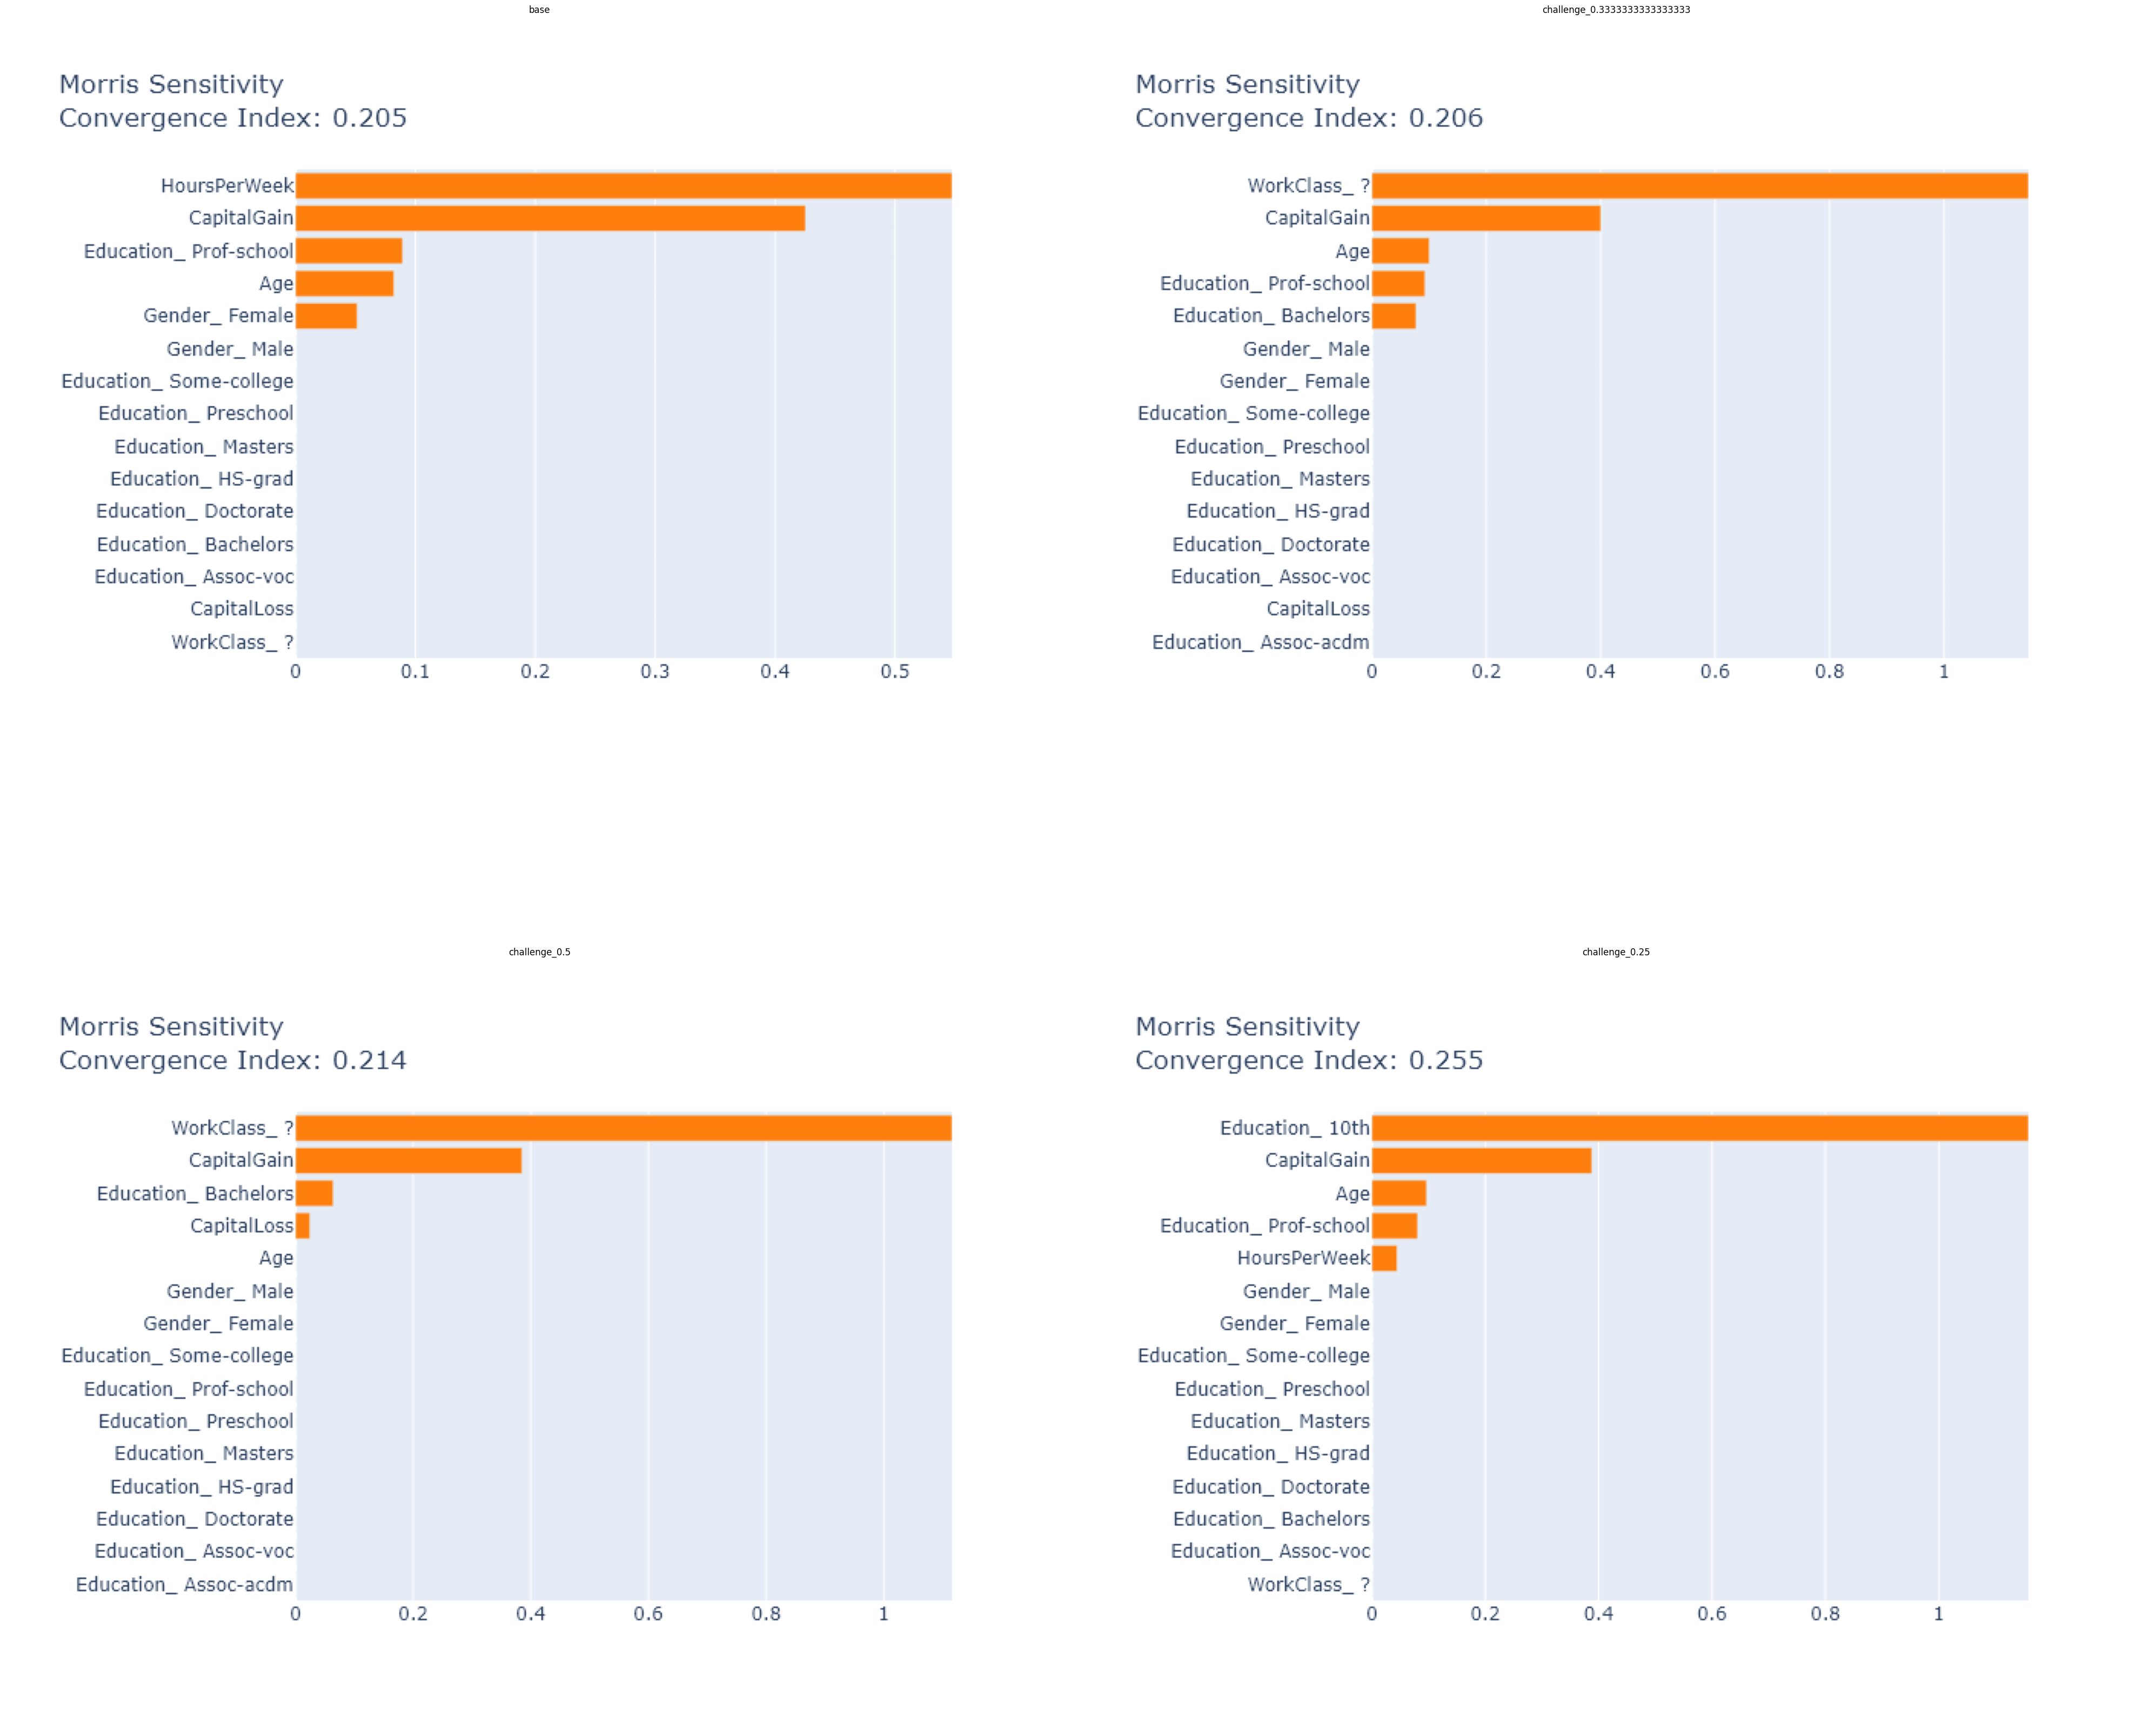

In [6]:
# explainer using Morris sensitivity from InterpretML
me = MorrisExplainer()
me.explain_challenge(cc, "morris_explainer_replace.png")

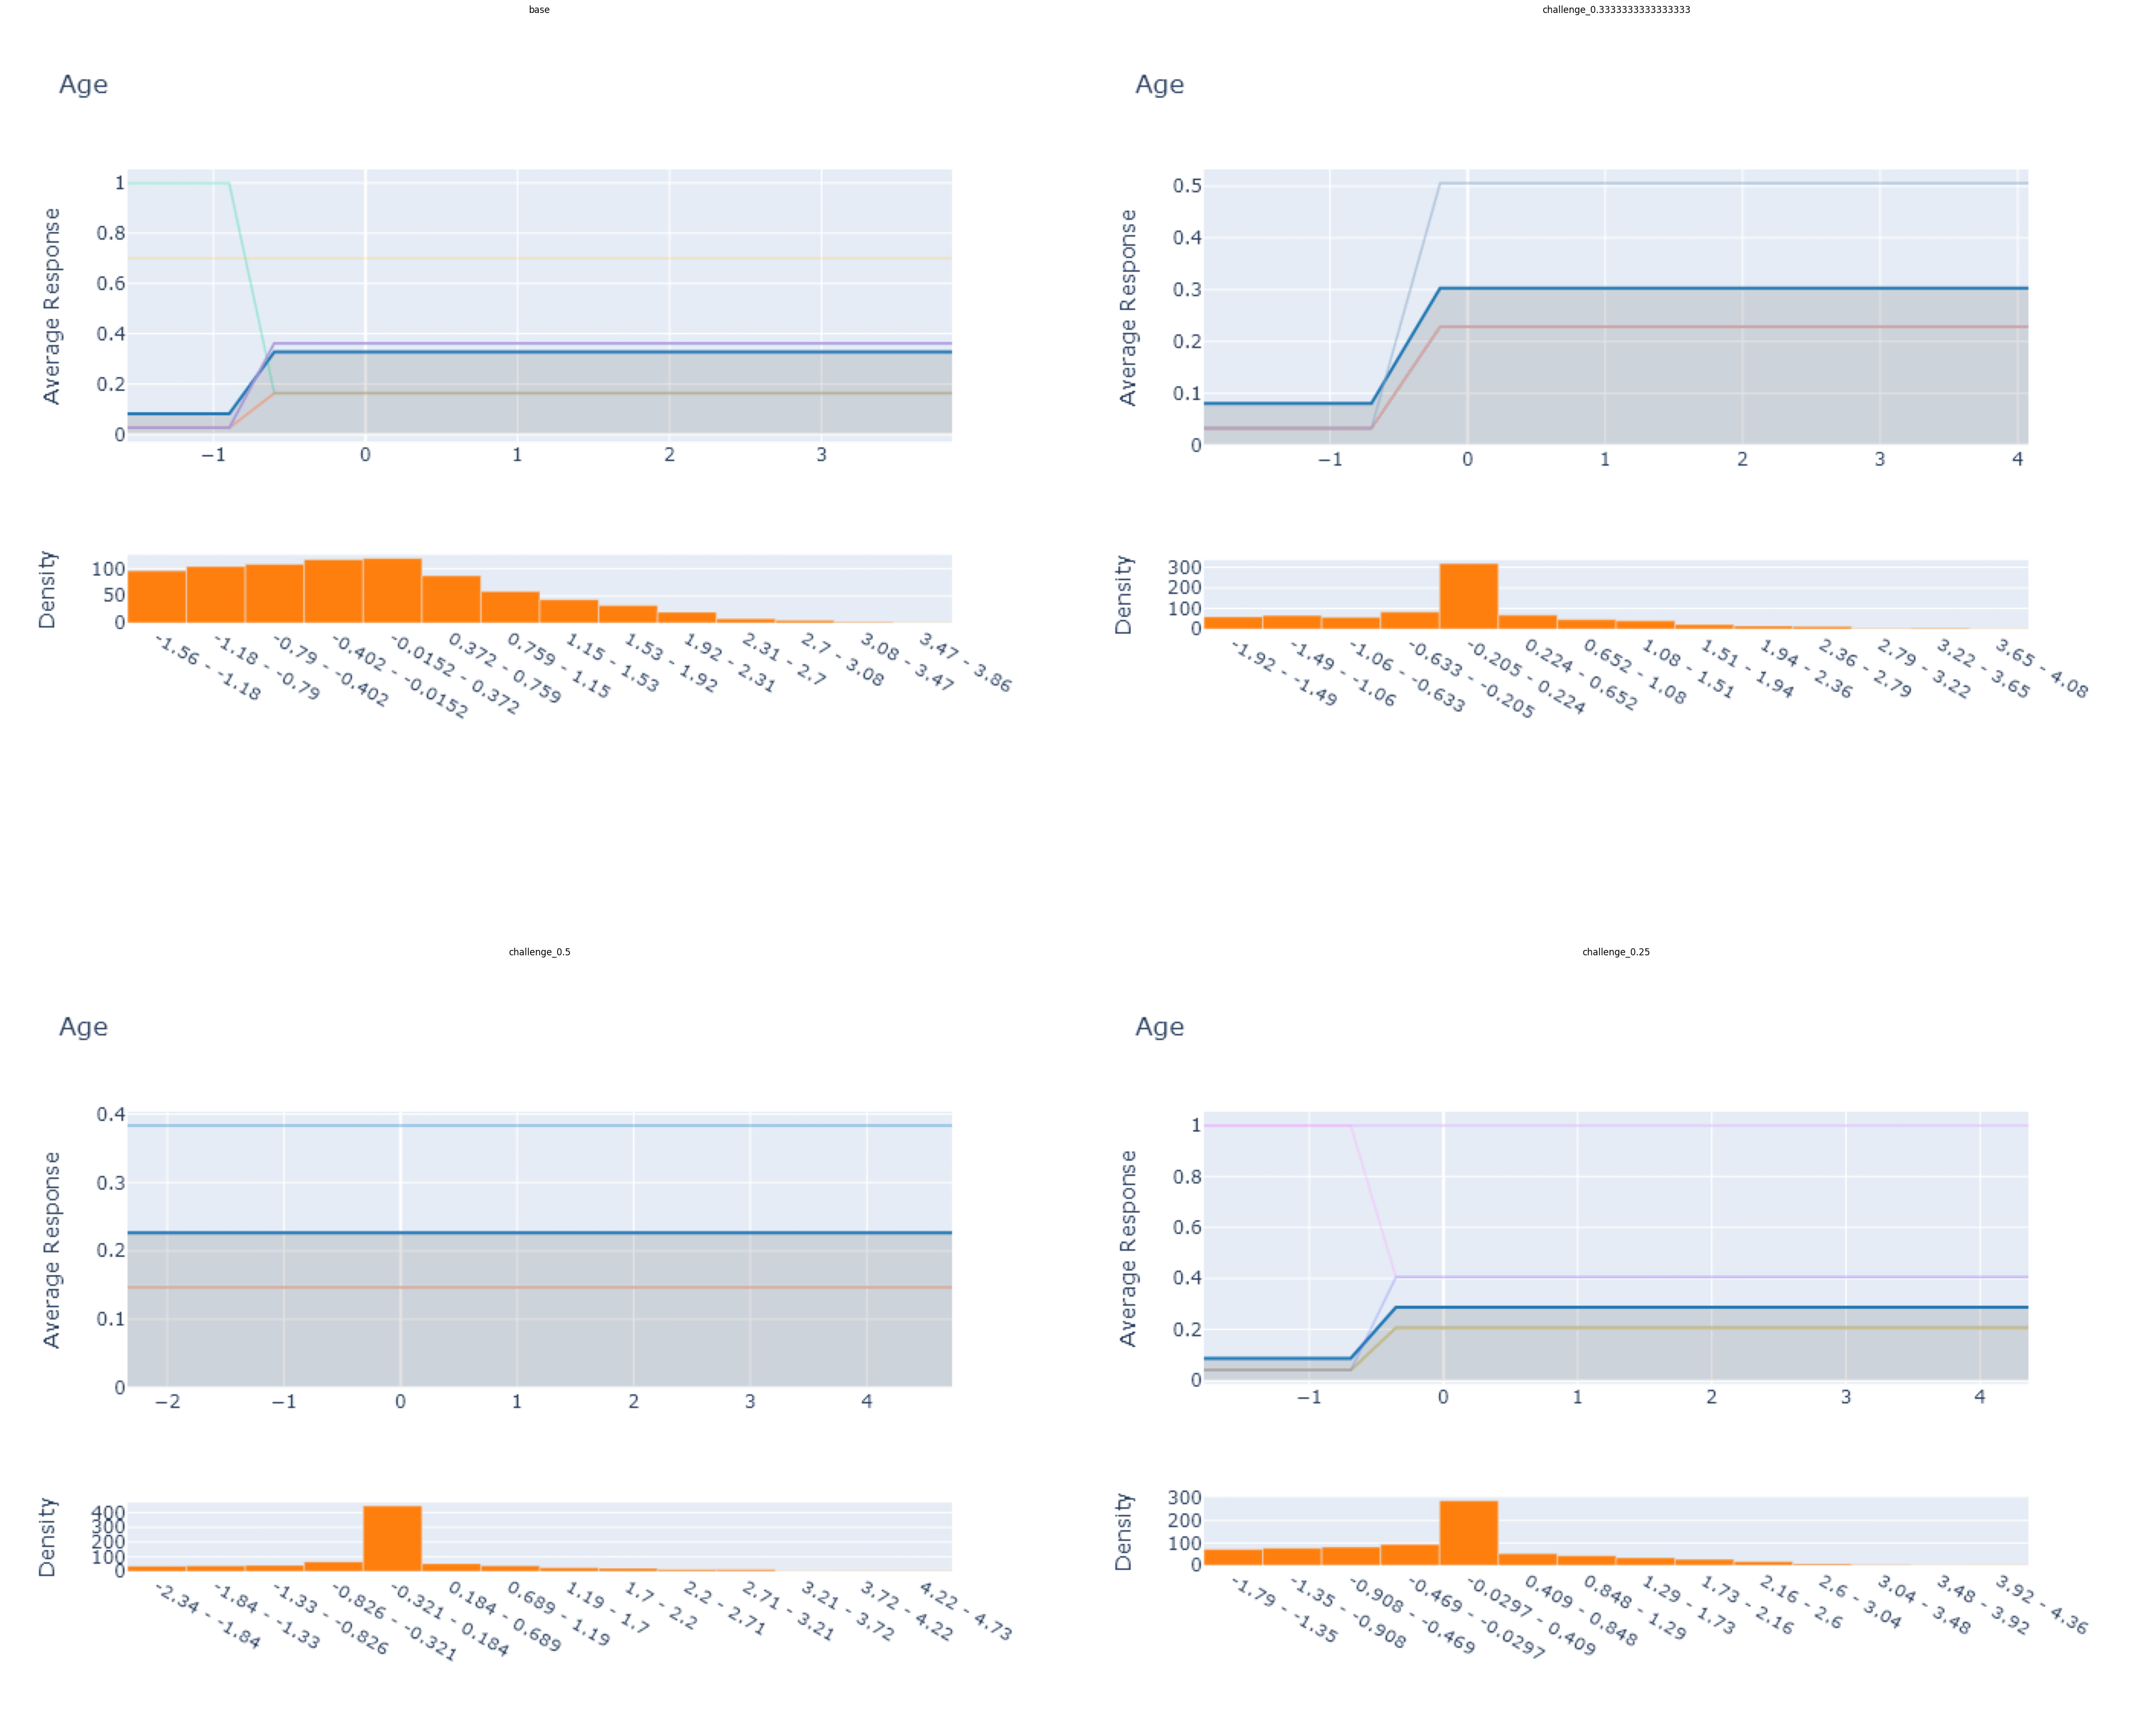

In [7]:
# feature explainer using partial dependence plot from InterpretML
pdpe = PDPExplainer()
pdpe.explain_challenge(cc, "Age", "pdp_explainer_replace.png")

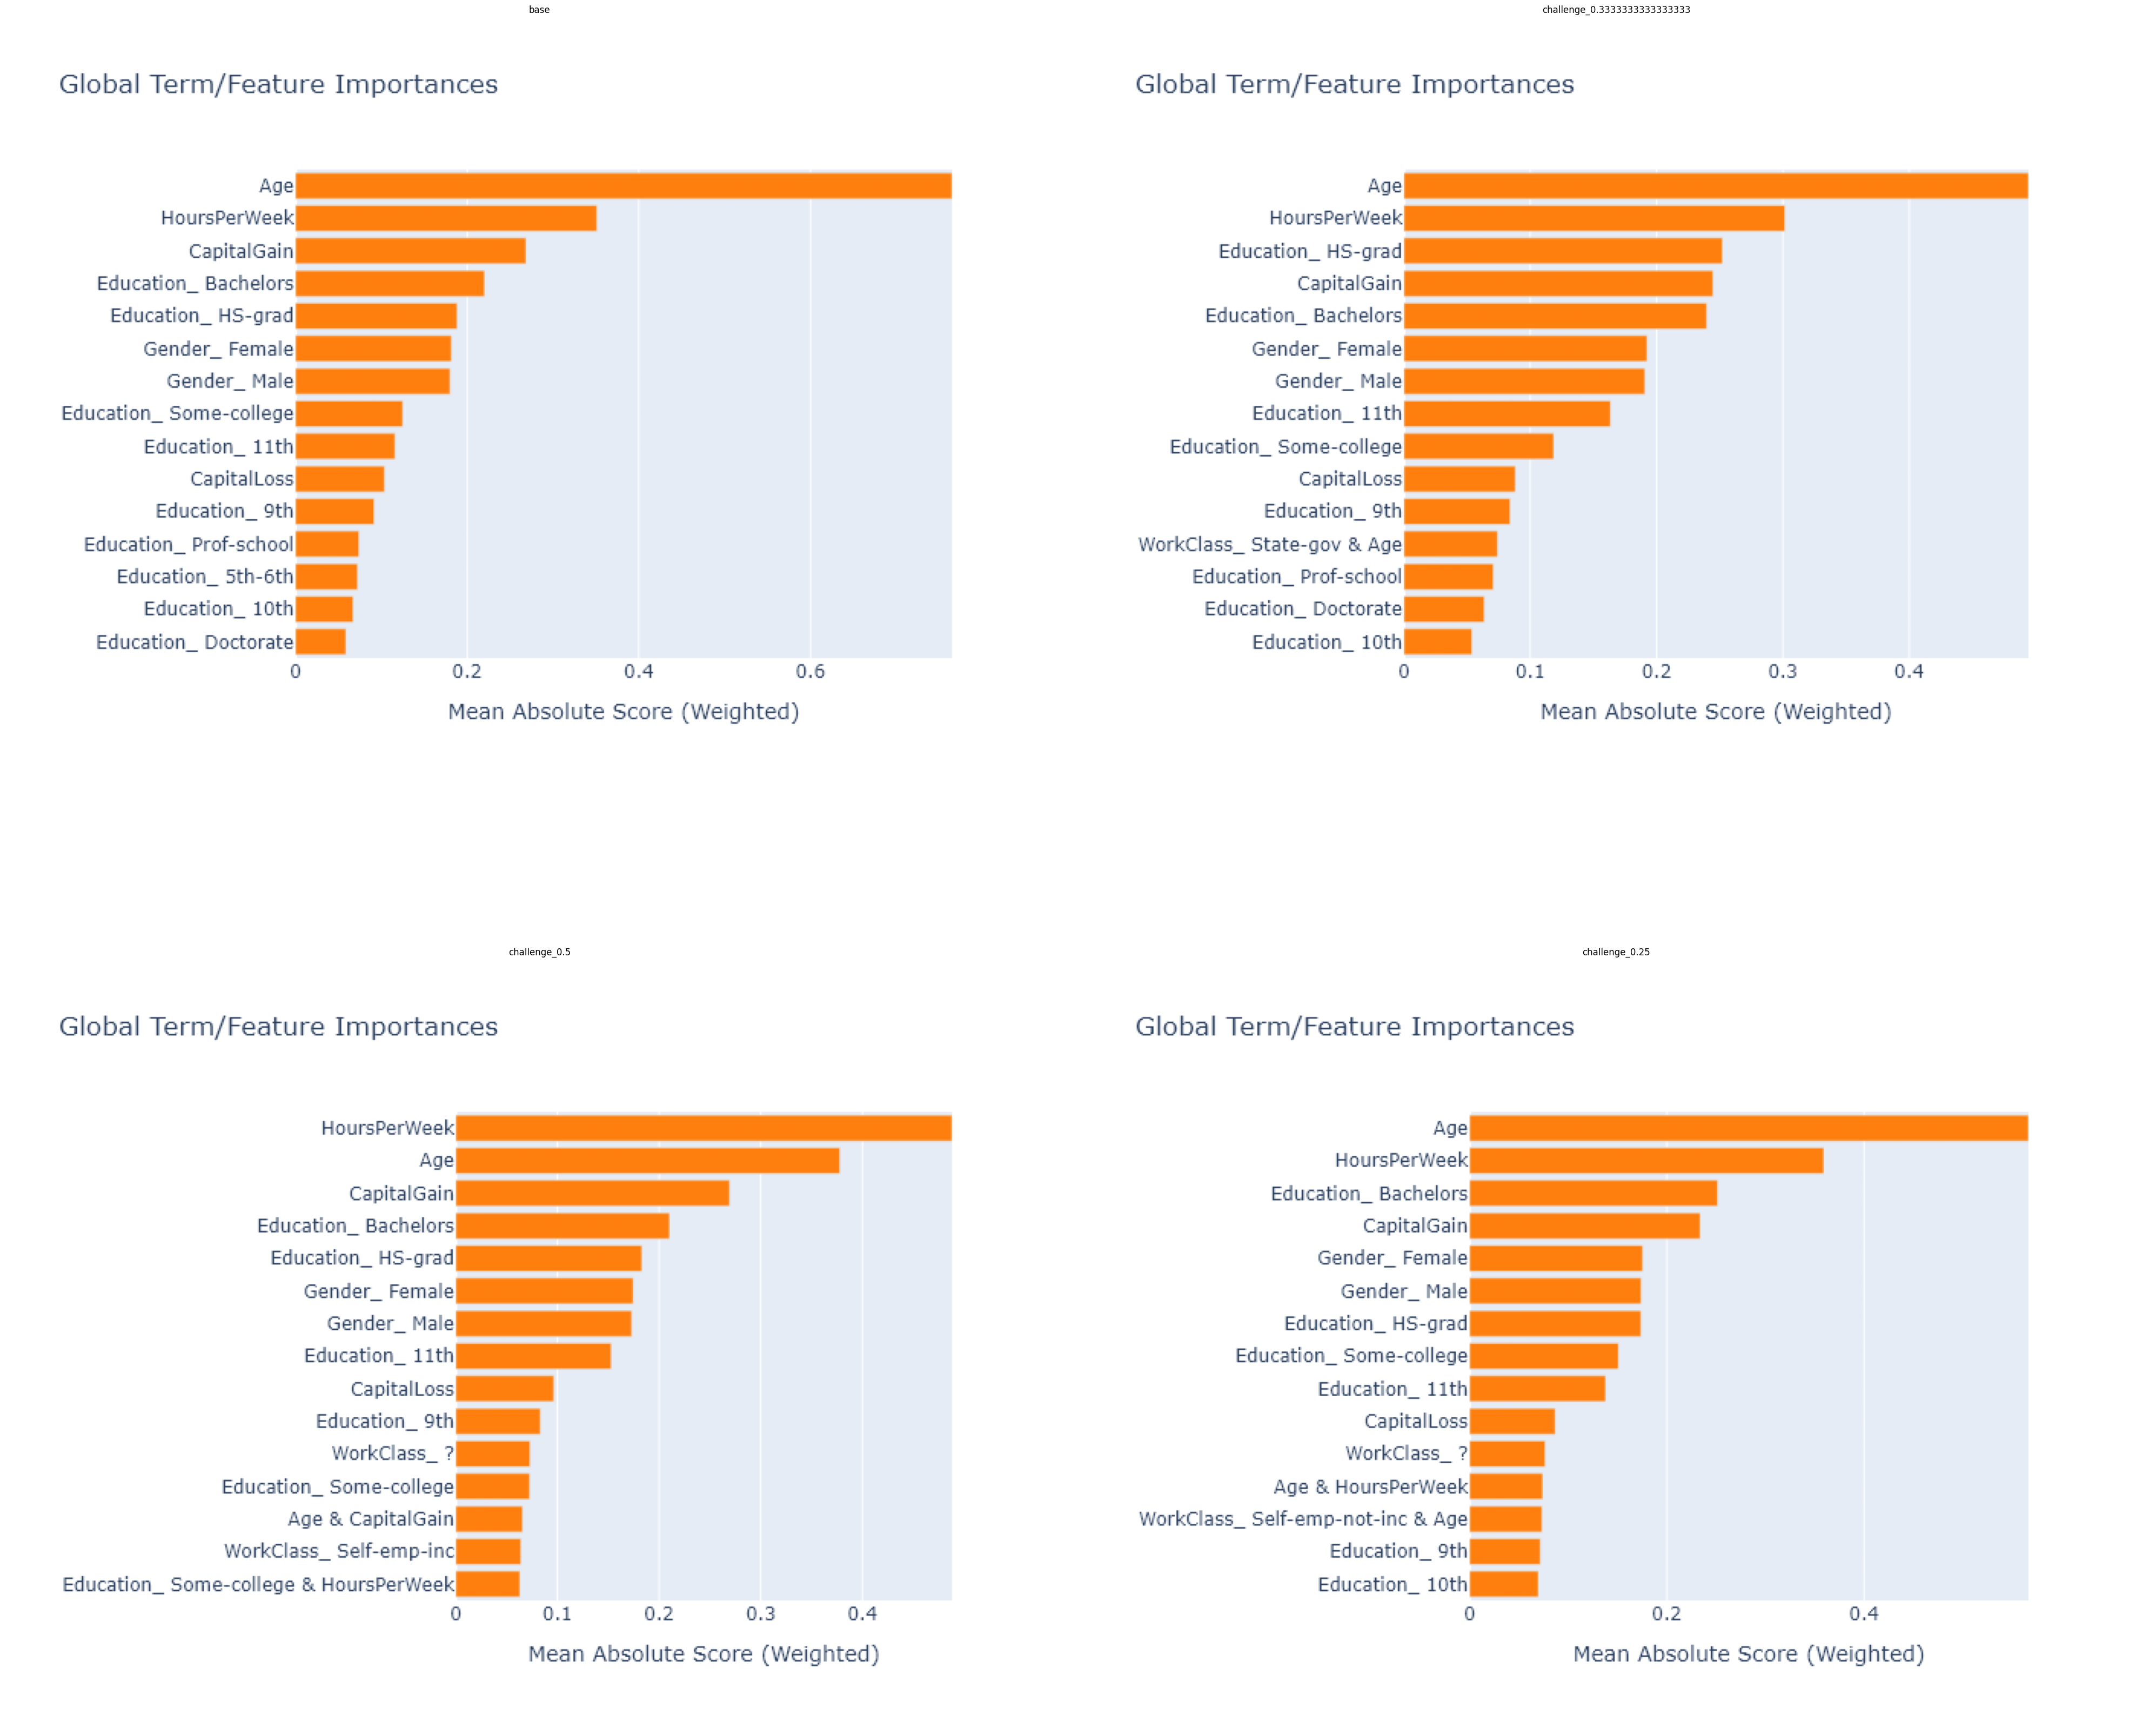

In [8]:
# explainer using explainable boosting machine from InterpretML glassbox models
model = ExplainableBoostingClassifier()
cc = CustomChallenger(model, df, label_column)
cc.generate_challenges()
cc.train_models(interpret=True)

ebme = EBMExplainer()
ebme.explain_challenge(cc, "ebm_explainer_replace.png")